In [104]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

In [105]:
torch.manual_seed(1)

In [106]:
a = 3
b = 4
x = torch.linspace(0, 10, 100).view(100, 1)

In [107]:
error = torch.randn(100, 1)

In [108]:
y = a * x + b + error

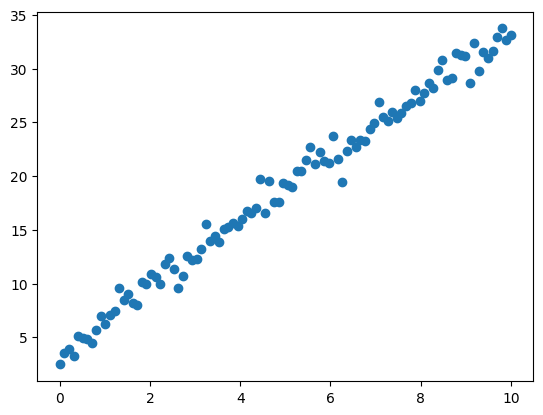

In [109]:
plt.scatter(x.numpy(), y.numpy())

In [110]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        out_put = self.linear(x)
        return out_put

In [111]:
model = LinearRegressionModel()

In [112]:
test_x = torch.linspace(0, 5, 100).view(100, 1)

In [113]:
test_pred_y = model(test_x)

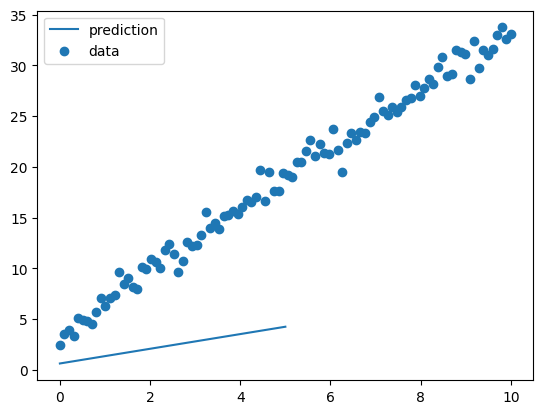

In [114]:
plt.plot(test_x, test_pred_y.detach(), label="prediction")
plt.scatter(x.numpy(), y.numpy(), label="data")
plt.legend()

In [115]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-4)

In [116]:
losses = []
num_epoch = 1000

for i in range(num_epoch):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

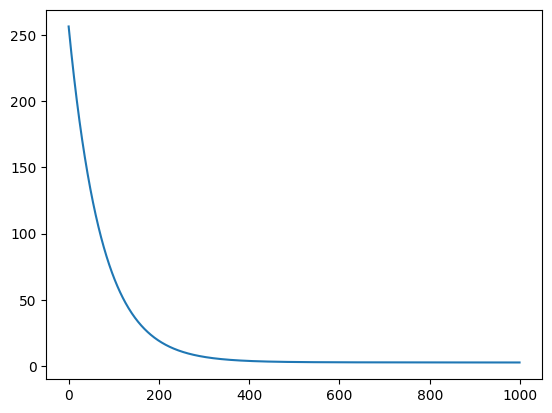

In [117]:
plt.plot(losses)

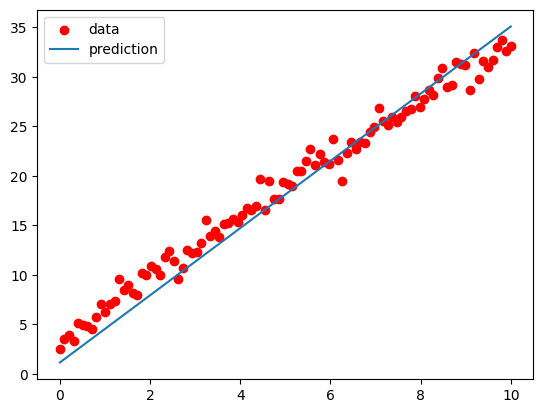

In [122]:
x_valid = torch.linspace(0, 10, 100).view(100, 1)
y_valid = model(x_valid)
plt.scatter(x.numpy(), y.numpy(), label="data", color="red")
plt.plot(x_valid.numpy(), y_valid.detach().numpy(), label="prediction")
plt.legend()